In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


df_comercio=pd.read_csv("comercio_df.csv",sep=",")
df_correo=pd.read_csv("correo_df.csv",sep=",")
#df_comercio.cuerpo

# Separamos meses para primer testeo

In [2]:
df_comercio['dia']=pd.to_datetime(df_comercio['dia'].str.strip(),format='%d-%m-%Y')
df_comercio['medio']='comercio'
df_correo['dia']=pd.to_datetime(df_correo['dia'].str.strip(),format='%d-%m-%Y')
df_correo['medio']='correo'

In [3]:
slaisin1=df_comercio[df_comercio['dia']<'03-01-2017']
slaisin2=df_correo[df_correo['dia']<'03-01-2017']
test=pd.concat([slaisin1,slaisin2],axis=0)

In [4]:
concateado=pd.concat([df_comercio,df_correo],axis=0)

# Modelo

In [5]:
concateado['cuerpo'].fillna('', inplace=True)
concateado.head()

C:\Users\gonza\AppData\Local\Temp\ipykernel_15056\1315532190.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  concateado['cuerpo'].fillna('', inplace=True)


,link,headline,bajada,antetitulo,cuerpo,dia,etiquetas,medio
0,https://elcomercio.pe/vamos/peru/10-destinos-p...,10 destino playa preferido turista peruano,segun estudio kayak miami destino plair mas so...,Perú,10 destino playa preferido turista peruano 10 ...,2017-01-09,"destinos, playa",comercio
1,https://elcomercio.pe/mundo/europa/bbc-cerca-s...,bbc cerca sarcofago gigante chernobil,construccion demoro tres decada estructura mov...,,lider mundo ejecutivo empresa global hombre ve...,2017-01-09,"BBC, Chernóbil",comercio
2,https://elcomercio.pe/opinion/habla-culta/mart...,martha hildebrandt significado ventanillero,seccion hablar culto reconocido lingüista expl...,Habla culta,adjetivo sustantivado derivado ventanilla aber...,2017-01-09,"Martha Hildebrandt, Habla culta",comercio
3,https://elcomercio.pe/politica/gobierno/judici...,poder judicial esperar terminar marzo juicio u...,juicio iniciado 2015 sufrido dilación tribunal...,Gobierno,colegiado b sala penal nacional poder judicial...,2017-01-09,Daniel Urresti,comercio
4,https://elcomercio.pe/mundo/eeuu/atacante-fort...,atacante fort lauderdale comparecio justicia,audiencia jueza alicia valle hacer saber afron...,EEUU,veterano guerra iraq ester santiago comparecio...,2017-01-09,"Fort Lauderdale, Estados Unidos",comercio


In [6]:
tfidf = TfidfVectorizer(
    max_df=0.9,
    min_df=5,
)
tfidf.fit(concateado.cuerpo)
text = tfidf.transform(concateado.cuerpo)


In [7]:
text

<71935x58588 sparse matrix of type '<class 'numpy.float64'>'
	with 8430216 stored elements in Compressed Sparse Row format>

Fit 80 clusters
Fit 90 clusters
Fit 100 clusters
Fit 110 clusters
Fit 120 clusters
Fit 130 clusters
Fit 140 clusters
Fit 150 clusters


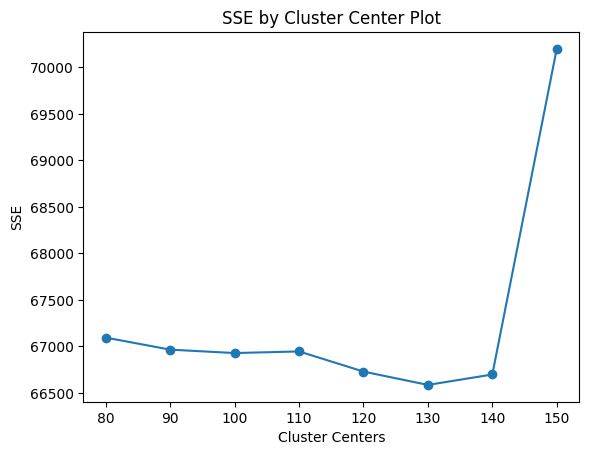

In [59]:
def find_optimal_clusters(data, max_k):
    iters = range(80, max_k+1, 10)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 150)

In [8]:
n = 130
clusters = MiniBatchKMeans(n_clusters=n, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

In [9]:
len(clusters)

71935

In [10]:
concateado['cluster']=clusters
concateado=concateado.reset_index()


In [11]:
import umap.umap_ as umap

umap_model = umap.UMAP(n_components=2, random_state=42, n_neighbors=30, min_dist=0.1)
umap_results = umap_model.fit_transform(text.toarray())


c:\Users\gonza\Desktop\Proy-Ana\ProyAna\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


MemoryError: Unable to allocate 15.7 GiB for an array with shape (71935, 58588) and data type float32

In [ ]:
tsne_df = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])

In [ ]:
test['tsne1']=tsne_df['tsne1']
test['tsne2']=tsne_df['tsne2']

In [ ]:
test.head()

,index,link,headline,bajada,antetitulo,cuerpo,dia,etiquetas,medio,cluster,tsne1,tsne2
0,0,https://elcomercio.pe/vamos/peru/10-destinos-p...,10 destino playa preferido turista peruano,segun estudio kayak miami destino plair mas so...,Perú,10 destino playa preferido turista peruano 10 ...,2017-01-09,"destinos, playa",comercio,3,-46.911114,-5.311690
1,1,https://elcomercio.pe/mundo/europa/bbc-cerca-s...,bbc cerca sarcofago gigante chernobil,construccion demoro tres decada estructura mov...,,lider mundo ejecutivo empresa global hombre ve...,2017-01-09,"BBC, Chernóbil",comercio,3,-3.056774,2.558045
2,2,https://elcomercio.pe/opinion/habla-culta/mart...,martha hildebrandt significado ventanillero,seccion hablar culto reconocido lingüista expl...,Habla culta,adjetivo sustantivado derivado ventanilla aber...,2017-01-09,"Martha Hildebrandt, Habla culta",comercio,3,-68.787430,-8.996247
3,3,https://elcomercio.pe/politica/gobierno/judici...,poder judicial esperar terminar marzo juicio u...,juicio iniciado 2015 sufrido dilación tribunal...,Gobierno,colegiado b sala penal nacional poder judicial...,2017-01-09,Daniel Urresti,comercio,46,25.560099,-56.948025
4,4,https://elcomercio.pe/mundo/eeuu/atacante-fort...,atacante fort lauderdale comparecio justicia,audiencia jueza alicia valle hacer saber afron...,EEUU,veterano guerra iraq ester santiago comparecio...,2017-01-09,"Fort Lauderdale, Estados Unidos",comercio,26,-42.968987,-14.152022


In [ ]:
for i in range(10):
    print('cluster',i+1,test[test['cluster']==i].shape)

cluster 1 (74, 12)
cluster 2 (39, 12)
cluster 3 (60, 12)
cluster 4 (1237, 12)
cluster 5 (17, 12)
cluster 6 (32, 12)
cluster 7 (120, 12)
cluster 8 (36, 12)
cluster 9 (86, 12)
cluster 10 (117, 12)


In [ ]:
import plotly.express as px

# Define tu paleta de colores personalizada
colores_personalizados = ["FF0000","0000FF","00FF00","FFFF00","FF00FF","00FFFF","FFA500","800080", "A52A2A","000000"]

# Crea el gráfico con la escala de color discreta y sin barra de colores
fig = px.scatter(test, x='tsne1', y='tsne2', color='cluster', 
                 hover_data=['headline', 'etiquetas'], 
                 symbol='medio',
                 color_discrete_map={0: colores_personalizados[0], 1: colores_personalizados[1], 2: colores_personalizados[2], 
                                     3: colores_personalizados[3], 4: colores_personalizados[4], 5: colores_personalizados[5], 
                                     6: colores_personalizados[6], 7: colores_personalizados[7], 8: colores_personalizados[8], 
                                     9: colores_personalizados[9]},
                 color_discrete_sequence=colores_personalizados)

# Elimina la barra de colores
fig.update_coloraxes(showscale=False)

# Ajusta los marcadores para tener bordes negros
fig.update_traces(marker=dict( line=dict(color='black', width=1)))
fig.update_layout(width=1200, height=900)
# Muestra el gráfico
fig.show()


In [62]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names_out(), 10)

KeyboardInterrupt: 